# Homework 4: DataFrames, Control Flow, and Probability

## Due Tuesday, October 25th at 11:59PM

Welcome to Homework 4! This homework will cover lots of different topics:
- Grouping with subgroups (see [BPD 11](https://notes.dsc10.com/02-data_sets/groupby.html#subgroups))
- Merging DataFrames (see [BPD 13](https://notes.dsc10.com/02-data_sets/merging.html))
- Conditional statements (see [CIT 9.1](https://inferentialthinking.com/chapters/09/1/Conditional_Statements.html))
- Iteration (see [CIT 9.2](https://inferentialthinking.com/chapters/09/2/Iteration.html))
- Probability (see [CIT 9.5](https://inferentialthinking.com/chapters/09/5/Finding_Probabilities.html))

### Instructions

This assignment is due Tuesday, October 25th at 11:59PM. You are given six slip days throughout the quarter to extend deadlines. See the syllabus for more details. With the exception of using slip days, late work will not be accepted unless you have made special arrangements with your instructor. 

Remember to start early and submit often. 

**Important**: For homeworks, the `otter` tests don't usually tell you that your answer is correct. More often, they help catch careless mistakes. It's up to you to ensure that your answer is correct. If you're not sure, ask someone (not for the answer, but for some guidance about your approach). These are great questions for office hours (the schedule can be found [here](https://dsc10.com/calendar)) or EdStem. Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. 

In [1]:
# Please don't change this cell, but do make sure to run it.
import babypandas as bpd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np
import otter
grader = otter.Notebook()
answer_words = bpd.read_csv('data/wordle.csv').get('word').values

# We need to import some extra packages for some fun demonstrations.
import json
from ipywidgets import interact, widgets
from IPython.display import YouTubeVideo, HTML, display, clear_output, Image, IFrame

# Don't worry about this.
def read_json(path):
    f = open(path, 'r')
    return json.load(f)

def candy_map():
    src = f"https://map.candystore.com/halloween/2022/fullscreen.html"
    width = 600
    height = 400
    display(IFrame(src, width, height))

%reload_ext pandas_tutor

### Supplemental Video on DataHub and Jupyter Notebooks

In Lab 1, we linked you to a video that walks you through key ideas you should be aware of when working on DataHub and in Jupyter Notebooks, including
- how files are organized on DataHub
- what it means to "restart the kernel"
- how to use keyboard shortcuts (most important: use `SHIFT + ENTER` to run a cell!)

We're linking it here again for your convenience. If you feel a little shaky on how to work your way around a notebook or troubleshoot issues, we recommend you give it another watch. (When troubleshooting, make sure to always check the [Debugging](https://dsc10.com/debugging/) tab on the course website as well.)

The video is quite long, but if you open the video directly on YouTube (which you can do by clicking the video's title after it loads in the next cell) you'll see timestamps in the description which you can use to jump to different parts of the video depending on what you'd like to learn more about.

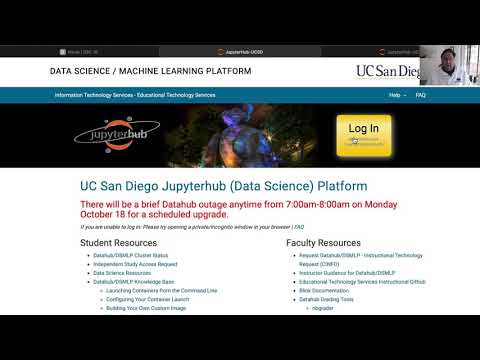

In [2]:
# Run this cell.
YouTubeVideo('Hq8VaNirDRQ')

## 0. DSC Student Rep Survey 🙏🏼

The Data Science Student Representatives and the DSC 10 couse staff created a survey for you to voice your opinion about what you love in DSC 10, and how we can improve your class and the department!

Feel free to talk about the topics covered in this course, the lectures and staff, resources, course structure, or anything else you feel is relevant and constructive.

Please
**[click here](https://docs.google.com/forms/d/e/1FAIpQLSd7soG9rXzWqaoieBm3-VtQxmMU9DRB3_7ihXP6tZlU58I0xQ/viewform?usp=sf_link)** to complete the survey. If you aren't able to access it, make sure you're logged into your UCSD Google account.

**At the very bottom of the survey, you are given a codeword. Set `completed_survey` to that codeword.**

In [3]:
completed_survey = 'adultzebra'

In [4]:
grader.check("q0")

q0 results: All test cases passed!

## 1. DSC 40A Homeworks 📝

In this problem, we'll look at a dataset consisting of the point breakdowns of all homework assignments in the Fall 2021 offering of DSC 40A, another DSC course that covers the mathematical foundations of data science and machine learning. The homework assignments in DSC 40A consist of long-answer open-ended questions that are often broken into several parts. Each part is worth a different amount of points, depending on the difficulty.

Run the cell below to load this dataset as a DataFrame and store it in the `hw` variable, and answer the questions that follow.

In [5]:
hw = bpd.read_csv('data/dsc40a-fa21-hw.csv')
hw

,Homework,Question,Part,Points
0,1,1,a,4
1,1,1,b,1
2,1,1,c,2
3,1,1,d,3
4,1,2,a,1
...,...,...,...,...
115,8,1,a,4
116,8,1,b,4
117,8,1,c,2
118,8,1,d,2


**Question 1.1.** How many homework questions were assigned in DSC 40A throughout the quarter? Store the result in the variable `num_questions`.

*Note*: We are asking for the number of homework questions, not the number of parts.

In [6]:
num_questions = hw.groupby(['Homework', 'Question']).min().shape[0]
# count = 0
# for i in range(num_questions.shape[0]):
#     count = count + 1
#     print(num_questions.index[i])
# print(count)
num_questions

32

In [7]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 1.2.** How many parts were there in each homework question? Create a DataFrame named `num_parts` with one row for each homework question and columns `'Homework'`, `'Question'`, and `'Num_Parts'`, which describes the total number of parts that homework question had. The first few rows of `num_parts` are shown below.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Homework</th>
      <th>Question</th>
      <th>Num_Parts</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>1</td>
      <td>4</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>2</td>
      <td>12</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>3</td>
      <td>3</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>4</td>
      <td>2</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1</td>
      <td>5</td>
      <td>5</td>
    </tr>
  </tbody>
</table>

*Hint*: Don't forget to use `.reset_index()`.

In [8]:
num_parts = hw.groupby(['Homework', 'Question']).count().drop(columns = {'Points'}).reset_index()
num_parts

,Homework,Question,Part
0,1,1,4
1,1,2,12
2,1,3,3
3,1,4,2
4,1,5,5
...,...,...,...
27,7,1,4
28,7,2,3
29,7,3,3
30,7,4,2


In [9]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 1.3.** How many points was each homework question worth? Create a DataFrame named `num_points` that has one row for each homework question and columns `'Homework'`, `'Question'`, and `'Num_Points'`, which is the total number of points that homework question was worth. The first few rows of `num_points` are shown below.

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Homework</th>
      <th>Question</th>
      <th>Num_Points</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>1</td>
      <td>1</td>
      <td>10</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>2</td>
      <td>17</td>
    </tr>
    <tr>
      <th>2</th>
      <td>1</td>
      <td>3</td>
      <td>8</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>4</td>
      <td>6</td>
    </tr>
    <tr>
      <th>4</th>
      <td>1</td>
      <td>5</td>
      <td>15</td>
    </tr>
  </tbody>
</table>


In [10]:
num_points = hw.groupby(['Homework', 'Question']).sum().reset_index()
num_points

,Homework,Question,Points
0,1,1,10
1,1,2,17
2,1,3,8
3,1,4,6
4,1,5,15
...,...,...,...
27,7,1,7
28,7,2,8
29,7,3,6
30,7,4,4


In [11]:
grader.check("q1_3")

q1_3 results: All test cases passed!

## 2. Death and Taxes 💰💸

The United States, like many countries, uses a progressive tax bracket system. This means that as your earnings increase, the percentage of your earnings you owe in tax also increases. In addition, the US tax system uses marginal tax brackets – what this means is that US taxpayers pay different tax percentages on different "chunks" of their earnings.

Let's suppose the tax brackets for the 2023 tax year for single filers are defined by the table below. These are pretty close to the actual brackets, but for simplicity's sake we'll use 5 brackets instead of 7. 

| Tax Bracket | Taxable Income |
| --- | --- |
| 10% | [$0, \\$11,000] |
| 12% | (\\$11,000, \\$44,725] |
| 22% | (\\$44,725, \\$95,375] |
| 24% | (\\$95,375, \\$182,100] |
| 32% | Over \\$182,100 |

**You will need to use these numbers throughout this question.**

A few notes:
- The notation $(a, b]$ means "greater than $a$ and less than or equal to $b$". For example, someone with a taxable income of \\$44,725 is in the 12% bracket, but someone with a taxable income of \\$44,725.01 is in the 22% bracket.
- "Taxable income" refers to the part of one's income that is taxable; in the US there is what's known as a "standard deduction" which can be thought of as a discount on your taxes. In this question, we won't worry about deductions.

If someone has a taxable income of \\$75,000, we say they are in the 22% tax bracket. However, such an individual doesn't owe 22% of \\$75,000 in taxes. Instead, they owe:
- 10% of \\$11,000, **plus**
- 12% of \\$33,725 (which is \\$44,725 - \\$11,000), **plus**
- 22% of \\$30,275 (which is \\$75,000 - \\$44,725).

More concretely, their tax owed is
$$0.1 \cdot \$11{,}000 + 0.12 \cdot \$33{,}725 + 0.22 \cdot \$30{,}275$$ 

which adds up to \\$11,807.50. This makes their **effective tax rate** $\frac{11807.50}{75000} = 0.15743$, or 15.743\%, because they wound up having to pay 15.743\% of their taxable income in taxes.

If you want to read more about the US federal income tax system, click [here](https://www.taxpolicycenter.org/briefing-book/how-do-federal-income-tax-rates-work).

**Question 2.1.** Complete the implementation of the function `tax_bracket`, which takes in a taxable income (`income`) and returns the tax bracket it is in, as a **proportion**. For instance, `tax_bracket(75000)` should evaluate to `0.22` and `tax_bracket(402150)` should evaluate to `0.32`.

For your convenience, the tax bracket table is shown again below.

| Tax Bracket | Taxable Income |
| --- | --- |
| 10% | [$0, \\$11,000] |
| 12% | (\\$11,000, \\$44,725] |
| 22% | (\\$44,725, \\$95,375] |
| 24% | (\\$95,375, \\$182,100] |
| 32% | Over \\$182,100 |

*Hint*: Use `elif`.

In [12]:
def tax_bracket(income):
    if 0 <= income <= 11000:
        return 0.10
    elif income <= 44725:
        return 0.12
    elif income <= 95375:
        return 0.22
    elif income <= 182100:
        return 0.24
    elif income > 182100:
        return 0.32
# taxes = np.array([0, 100, 11000, 11001, 22222, 44725, 44726, 55555, 95375, 95376, 99999, 182100, 182101, 10000000])
# func = np.vectorize(tax_bracket)
# print(func(taxes))
# results = np.array([1,1,1,2,2,2,3,3,3,4,4,4,5,5])
# print(results)

In [13]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.2.** Complete the implementation of the function `tax_owed`, which takes in a taxable income (`income`) and returns the amount of tax owed by an individual with that taxable income. For instance, `tax_owed(75000)` should evaluate to `11807.50` as in the example at the start of Question 2.

For your convenience, the tax bracket table is shown again below.

| Tax Bracket | Taxable Income |
| --- | --- |
| 10% | [$0, \\$11,000] |
| 12% | (\\$11,000, \\$44,725] |
| 22% | (\\$44,725, \\$95,375] |
| 24% | (\\$95,375, \\$182,100] |
| 32% | Over \\$182,100 |

*Hint*: Below are some suggested steps to break down this problem into manageable chunks.
1. Make sure you understand the example calculating the tax owed on \\$75,000 of taxable income. 
2. Once you're sure you understand the given example calculation, then calculate the tax owed for a different taxable income, say \\$152,000, by hand. 
3. In a blank cell in your notebook, write Python code to compute the tax owed for \\$152,000 in taxable income and verify you get the same answer as when you did it by hand. 
4. Once you have that working, write the more general function and test it on a variety of inputs.

In [14]:
def tax_owed(income):
    tax_owe = 0
    if income <= 11000:
        tax_owe = (income - 0) * 0.1
    elif 11000 < income <= 44725:
        tax_owe = 11000 * 0.1 + (income - 11000) * 0.12
    elif 44725 < income <= 95375:
        tax_owe = 11000 * 0.1 + 33725 * 0.12 + (income - 44725) * 0.22
    elif 95375 < income <= 182100:
        tax_owe = 11000 * 0.1 + 33725 * 0.12 + 50650 * 0.22 + (income - 95375) * 0.24
    elif income > 182100:
        tax_owe = 11000 * 0.1 + 33725 * 0.12 + 50650 * 0.22 + 86725 * 0.24 + (income - 182100) * 0.32
    return tax_owe

# print(tax_bracket(10), tax_owed(10))
# print(tax_bracket(10000), tax_owed(10000))
# print(tax_bracket(30000), tax_owed(30000))
# print(tax_bracket(75000), tax_owed(75000))
# print(tax_bracket(152000), tax_owed(152000))
# print(tax_bracket(400000), tax_owed(400000))

In [15]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 2.3.** Finally, complete the implementation of `effective_tax_rate`, which takes in a taxable income (`income`) and returns the effective tax rate for an individual with that taxable income, as a **percentage**. For instance, `effective_tax_rate(75000)` should evaluate to `15.743` because someone who earns \\$75,000 of taxable income winds up having to pay 15.742% of that amount in taxes.

If `income` is less than or equal to 0, `effective_tax_rate` should evaluate to `0`.

*Hint*: You should use your `tax_owed` function. Our entire solution is only four lines, and two of them are for handling the case when `income <= 0`.

In [16]:
def effective_tax_rate(income):
    if income <= 0:
        return 0
    else:
        return (tax_owed(income) / income) * 100
# print(effective_tax_rate(75000))
# print(effective_tax_rate(152000))

In [17]:
grader.check("q2_3")

q2_3 results: All test cases passed!

### Fun Demo

You just did all of the math necessary to build an income tax calculator, like the ones you see on many financial websites. Run the following cell once you've completed the rest of this question!

In [18]:
# Don't worry about the code, just play with the slider that appears after running.
def plot_income_calculator(income):
    s = f'''
    <h1>DSC 10 Tax Calculator 💰💸</h1>
    <h3>{'${:,.2f}'.format(income)}</h3>
    Taxable Income
    
    <h2>{'${:,.2f}'.format(tax_owed(income))}</h2>
    Tax Owed
    
    <h3>{'{:,.1f}'.format((effective_tax_rate(income))) + '%'}</h3>
    Effective Tax Rate
    
    '''
    display(HTML(s))
    
interact(plot_income_calculator, income=(0, 200000, 1000));

## 3. Trick or Treat 🍭🎃

Halloween is fast approaching, and candy sales are skyrocketing as people stock up for trick-or-treating. For this question, we'll be exploring some data on the most popular Halloween candies in each state, from [this article](https://www.candystore.com/blogs/facts-trivia/halloween-candy-map-popular?y=2022).

Run the cell below to see a fun interactive data visualization from the same article.

In [19]:
candy_map()

In [20]:
states = bpd.read_csv('data/popular_candy_by_state.csv')
states

,State,Most_Popular_Candy,Pounds_Of_Candy
0,AL,Skittles,105263
1,AK,Sour Patch Kids,4873
2,AZ,Hersheys Kisses,779828
3,AR,Butterfinger,201837
4,CA,Reeses Peanut Butter Cups,1231675
...,...,...,...
46,DC,M&Ms,24770
47,WA,Tootsie Pops,167289
48,WV,Hersheys Mini Bars,36279
49,WI,Butterfinger,104829


In the `states` DataFrame above, each state's `'Most_Popular_Candy'` is recorded, based on candy sales in that state. `'Pounds_Of_Candy'` refers to the total pounds of that specific candy sold in that state.<br>

The `states` DataFrame does not contain any information about the candies themselves, e.g. which candies are chocolate and which candies are fruity. For this information, we can refer to a dataset curated by FiveThirtyEight for their article [The Ultimate Halloween Candy Power Ranking](https://fivethirtyeight.com/videos/the-ultimate-halloween-candy-power-ranking/). Run the cell below to load in a dataset containing information about many varieties of candy and save it as a DataFrame named `varieties`.

_Note_: The column in `varieties` that contains the names of the candies is `'competitorname'`, because these candies were all competing against each other in FiveThirtyEight's Halloween Candy Power Ranking.

In [21]:
varieties = bpd.read_csv('data/halloween_candy.csv')
varieties

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One Dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One Quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welchs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werthers Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


**Question 3.1.** Using the `merge` method, combine the `states` and `varieties` DataFrames, and assign the resulting DataFrame to the variable `states_and_varieties`. 
- `states_and_varieties` should contain all of the columns in both `states` and `varieties`, minus the `'competitorname'` column from `varieties`, which is redundant with the `'Most_Popular_Candy'` column from `states`.
- Sort `states_and_varieties` by `'State'` in ascending order.
- Reset the index of `states_and_varieties` so that it is `0`, `1`, `2`, and so on. Make sure the old index isn't also included as a column.

In [22]:
states_and_varieties = states.merge(varieties, left_on='Most_Popular_Candy', right_on='competitorname')
states_and_varieties = states_and_varieties.sort_values('State').reset_index().drop(columns = {'index', 'competitorname'})
# for i in states.get('State').to_numpy():
#     if i not in states_and_varieties.get('State').to_numpy():
#         print(i)
states_and_varieties

,State,Most_Popular_Candy,Pounds_Of_Candy,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,AK,Sour Patch Kids,4873,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998
1,AL,Skittles,105263,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140
2,AZ,Hersheys Kisses,779828,1,0,0,0,0,0,0,0,1,0.127,0.093,55.375454
3,CA,Reeses Peanut Butter Cups,1231675,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
4,CO,Hersheys Kisses,120982,1,0,0,0,0,0,0,0,1,0.127,0.093,55.375454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,UT,Tootsie Pops,403727,1,1,0,0,0,0,1,0,0,0.604,0.325,48.982651
40,VA,Snickers,151728,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
41,VT,M&Ms,36543,1,0,0,0,0,0,0,0,1,0.825,0.651,66.574585
42,WA,Tootsie Pops,167289,1,1,0,0,0,0,1,0,0,0.604,0.325,48.982651


In [23]:
grader.check("q3_1")

q3_1 results: All test cases passed!

**Question 3.2.** If you completed Question 3.1 correctly, you'll notice that `states_and_varieties` has fewer rows than both `states` and `varieties`. This is because there are some candies that are in `states` and not in `varieties`, and other candies that are in `varieties` and not in `states`. 

Below, assign `states_not_varieties` to the number of different candies that are in `states` and not in `varieties`. Similarly, assign `varieties_not_states` to the number of different candies that are in `varieties` and not in `states`.

_Hint_: There are two ways to find the number of unique values in a column.

1. Group by that column. On the resulting DataFrame, use `.shape[0]`.

2. Use the `.unique()` method on the Series corresponding to that column. Use `len` on the resulting array.

You'll need to do this three times – once each for the columns that contain candy names in `states`, `varieties`, and `states_and_varieties`.


<!--
BEGIN QUESTION
name: q3_2
-->

In [24]:
states_unique = states.get('Most_Popular_Candy').unique()
varieties_unique = varieties.get('competitorname').unique()
states_and_varieties_unique = states_and_varieties.get('Most_Popular_Candy').unique()

states_not_varieties = len(states_unique) - len(states_and_varieties_unique)
varieties_not_states = len(varieties_unique) - len(states_and_varieties_unique)

print('There are', states_not_varieties, 'candies in `states` that are not in `varieties`.')
print('There are', varieties_not_states, 'candies in `varieties` that are not in `states`.')


There are 2 candies in `states` that are not in `varieties`.
There are 70 candies in `varieties` that are not in `states`.


In [25]:
grader.check("q3_2")

q3_2 results: All test cases passed!

Now that we better understand how `states_and_varieties` came to be, let's use it to learn more about states' candy preferences.

In [26]:
states_and_varieties

,State,Most_Popular_Candy,Pounds_Of_Candy,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,AK,Sour Patch Kids,4873,0,1,0,0,0,0,0,0,1,0.069,0.116,59.863998
1,AL,Skittles,105263,0,1,0,0,0,0,0,0,1,0.941,0.220,63.085140
2,AZ,Hersheys Kisses,779828,1,0,0,0,0,0,0,0,1,0.127,0.093,55.375454
3,CA,Reeses Peanut Butter Cups,1231675,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
4,CO,Hersheys Kisses,120982,1,0,0,0,0,0,0,0,1,0.127,0.093,55.375454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,UT,Tootsie Pops,403727,1,1,0,0,0,0,1,0,0,0.604,0.325,48.982651
40,VA,Snickers,151728,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
41,VT,M&Ms,36543,1,0,0,0,0,0,0,0,1,0.825,0.651,66.574585
42,WA,Tootsie Pops,167289,1,1,0,0,0,0,1,0,0,0.604,0.325,48.982651


The 0s and 1s in the columns `'chocolate'`, `'fruity'`, `'caramel'`, etc. can be interpreted as Boolean values. For instance, since the state `'CA'` has a 1 in its `'chocolate'` column, it means that Calfornia's most popular candy is a chocolate candy.

**Question 3.3.** Among just the states in `states_and_varieties` where the most popular candy is a chocolate, what proportion of these states have a most popular candy that is also caramel? Assign your answer to `p_caramel_given_chocolate`. It should be a decimal between 0 and 1.

<!--
BEGIN QUESTION
name: q3_3
-->

In [27]:
chocolate = states_and_varieties[states_and_varieties.get('chocolate') == True]
caramel_and_chocolate = states_and_varieties[(states_and_varieties.get('caramel') == True) & (states_and_varieties.get('chocolate') == True)]
p_caramel_given_chocolate = caramel_and_chocolate.shape[0]/chocolate.shape[0]
p_caramel_given_chocolate

0.17857142857142858

In [28]:
grader.check("q3_3")

q3_3 results: All test cases passed!

## 4. Wordle 🟨 ⬛ 🟨 🟩 ⬛


<img src = "data/wordle_example.jpg" width=200>

[Wordle](https://www.nytimes.com/games/wordle/index.html) is a word-guessing game that became extremely popular at the end of 2021. Players have six tries to guess a five-letter word. To play, you first enter a guess for the five-letter word. After you make your guess, each letter of your guess will be highlighted with a color-coded square as follows:

- A black square ⬛ means that this letter is **not** in the word at all.  
- A yellow square 🟨 means that this letter is in the word, but in a **different position**.  
- A green square means 🟩 the letter is in the **correct position**.

In this question, you will replicate some of that behavior using Python dictionaries and `for`-loops. We'll make a simplifying assumption that's not present in the real Wordle game: the answer word will always have five **different** letters and every guess must also have five **different** letters.

 We'll start by refreshing our memories on Python dictionaries. Dictionaries provide a convenient way to store data in `key: value` pairs. You worked with a dictionary in Homework 3, Question 3 (Ramen 🍜). Here's an example dictionary you also saw in Homework 3.

In [29]:
dsc_courses = {
    # key: value
    'DSC 10': 'Principles of Data Science',
    'DSC 20': 'Programming and Basic Data Structures for Data Science',
    'DSC 30': 'Data Structures and Algorithms for Data Science',
    'DSC 40A': 'Theoretical Foundations of Data Science I',
    'DSC 40B': 'Theoretical Foundations of Data Science II',
    'DSC 80': 'The Practice and Application of Data Science'
}

We can access the value corresponding to each key using bracket notation.

In [30]:
dsc30_name = dsc_courses['DSC 30']
dsc30_name

'Data Structures and Algorithms for Data Science'

Here, `'DSC 30'` is the key and `'Data Structures and Algorithms for Data Science'` is the value.

**Question 4.1** In the cell below, create a dictionary called `colors` that has the following three keys:
- `'green'` 
- `'yellow'`
- `'black'`

The values corresponding to each of these three keys should be the colored square emojis `'🟩'`, `'🟨'` , and `'⬛'`.

*Note*: Emojis can be copy-pasted and included in strings, just like letters, numbers, and punctuation.

In [31]:
colors = {
    'green': '🟩',
    'yellow': '🟨',
    'black': '⬛'
}
type(colors)
#colors['black']

dict

In [32]:
grader.check("q4_1")

q4_1 results: All test cases passed!

Great! Now, if we want to create strings that use the green, yellow, and black square emojis, we don't need to copy-paste the emojis themselves – we can just access them from the `colors` dictionary.

In [33]:
colors['green']

'🟩'

In [34]:
# Remember, the + symbol concatenates strings!
colors['green'] + colors['black'] + colors['yellow'] + colors['black']

'🟩⬛🟨⬛'

Recall, in [Lecture 11](https://dsc10.com/resources/lectures/lec11/lec11.html), we introduced the accumulator pattern. In the coin-flipping example, we started an empty array, and added to it in each iteration of our `for`-loop.

We can also use the accumulator pattern for strings, and we will do just that in the next question. Here's an example:

In [35]:
output = ''
for ch in 'goodbye':
    if ch == 'g':
        output = output + colors['green']
    elif ch == 'b':
        output = output + colors['black']
    elif ch == 'y':
        output = output + colors['yellow']
    else:
        output = output + ch
output

'🟩ood⬛🟨e'

In the above example, we started with an empty string, `output`. For each character of the string `'good boy'`, we added a single new character to `output`, depending on whether we saw `'g'`, `'b'`, `'y'`, or something else.

**Question 4.2.** Now, complete the implementation of the function `emojify`, which takes as input two five-letter strings, each having no repeated letters. The first input string, `guess`, should be cross-checked with each letter of the second input string, `answer`. The function should return a new string, formed entirely of emojis from  the `colors` dictionary, that indicates the accuracy of each letter in the guess, as described in the rules above. For example, let's say the `answer` string is "shark". Here is how the function would work on various example guesses.

```py
>>> emojify('crept', 'shark')
'⬛🟨⬛⬛⬛'

>>> emojify('chalk', 'shark')
'⬛🟩🟩⬛🟩'

>>> emojify('harks', 'shark')
'🟨🟨🟨🟨🟨'

>>> emojify('sharp', 'shark')
'🟩🟩🟩🟩⬛'

>>> emojify('shark', 'shark')
'🟩🟩🟩🟩🟩'
```

_Note_: As we did in the preceeding example, use the dictionary `colors` to access the emojis – don't actually write any emojis within your function

_Hints_: 
- Look at the slide titled Ranges in [Lecture 11](https://dsc10.com/resources/lectures/lec11/lec11.html#Ranges) for guidance.
- You'll need to use the `in` keyword, which we also introduced in Lecture 11.

In [36]:
def emojify(guess, answer):
    # This line ensures your code works correctly regardless of 
    # whether the message is in upper case or lower case.
    guess = guess.lower()

    # Empty string to add on to.
    emoji_output_string = '' 
    for i in range(len(guess)):
        if guess[i] == answer[i]:
            emoji_output_string = emoji_output_string + colors['green']
        elif guess[i] in answer:
            emoji_output_string = emoji_output_string + colors['yellow']
        else:
            emoji_output_string = emoji_output_string + colors['black']
    # Don't change this
    return emoji_output_string

# An example call to emojify. Try out some other words, too.
# print(emojify('crept', 'shark'))
# print(emojify('chalk', 'shark'))
# print(emojify('harks', 'shark'))
# print(emojify('sharp', 'shark'))
# print(emojify('shark', 'shark'))

In [37]:
grader.check("q4_2")

q4_2 results: All test cases passed!

### Fun Demo

Run the cell below to produce a text box (don't worry about the code itself). Type a five-letter word with no repeated letters in the text box and play Wordle with a secret answer word. You can change your guess by backspacing and typing in a different guess. You can play more than once by running the cell again to generate a new answer word.

In [38]:
answer = np.random.choice(answer_words)
def emojify_live(type_here):
    display(HTML('<h2>' + emojify(type_here, answer) + '</h2>'))
interact(emojify_live, type_here="");

## 5. Alternating Means 🔁

In this problem, we'll define two functions that compute some sort of "alternating mean" of a sequence of values.

**Question 5.1.** Complete the implementation of the function `alternating_mean`, which takes in an array of numbers, `values`, and computes the mean of **every other element** in the original array starting with the element at position 0.

```py
>>> alternating_mean(np.array([2, 3.5, 1, 1.5]))
1.5 # comes from (2 + 1) / 2

>>> alternating_mean(np.array([2, 3.5, 1, 1.5, 4.5]))
2.5 # comes from (2 + 1 + 4.5) / 3

```

_Note_: Once you've written your function, you should test it out on several arrays yourself to make sure it works as intended.

_Hint_: Compute the mean by finding the sum of every other element in the array and dividing it by the number of elements that were summed.

<!--
BEGIN QUESTION
name: q5_1
-->

In [39]:
def alternating_mean(values):
    means = np.array([])
    for i in np.arange(0, len(values), 2):
        means = np.append(means, values[i])
    # print(means)
    return means.mean()
    
# Feel free to change this input to make sure your function works correctly.
print(alternating_mean(np.array([2, 3.5, 1, 1.5])))
print(alternating_mean(np.array([2, 3.5, 1, 1.5, 4.5])))
print(alternating_mean(np.array([2, 3.5, 1, 1.5, 4.5, 2, 3.5, 1])))

1.5
2.5
2.75


In [40]:
grader.check("q5_1")

q5_1 results: All test cases passed!

**Question 5.2.** In math, the word "alternating" is sometimes used to indicate that the signs of the elements of a sequence oscillate back and forth between positive and negative. Complete the implementation of the function `alternating_sign_mean`, which takes in an array of positive numbers, `values`, and computes the mean of **_every_ element** in the original array with **alternating signs**, starting with a positive sign for the element at position 0, a negative sign for the element at position 1, and so on. Example behavior is shown below.

```py
>>> alternating_sign_mean(np.array([2, 3.5, 4.5]))
1.0 # comes from (2 + (-3.5) + 4.5) / 3

>>> alternating_sign_mean(np.array([2, 3.5, 1, 1.5]))
-0.5 # comes from (2 + (-3.5) + 1 + (-1.5)) / 4
```

*Hint*: If `x` is an integer, `x % 2` evaluates to 0 when `x` is even and to 1 when `x` is odd. Use this to help you figure out the signs.

<!--
BEGIN QUESTION
name: q5_2
-->

In [41]:
def alternating_sign_mean(values):
    alt_sign = np.array([])
    for i in range(len(values)):
        if i % 2 == 0:
            alt_sign = np.append(alt_sign, values[i])
        else:
            alt_sign = np.append(alt_sign, -values[i])
    # print(alt_sign)
    return alt_sign.mean()
    
# Feel free to change this input to make sure your function works correctly.
print(alternating_sign_mean(np.array([2, 3.5, 4.5])))
print(alternating_sign_mean(np.array([2, 3.5, 1, 1.5])))
print(alternating_sign_mean(np.array([2, 3.5, 1, 1.5, 2, 3.5, 4.5])))

1.0
-0.5
0.14285714285714285


In [42]:
grader.check("q5_2")

q5_2 results: All test cases passed!

## 6. Lucky Triton Lotto 🔱 🎱 

Suppose UCSD holds an annual lottery called the Lucky Triton Lotto, where students can enter to win Triton Cash, or even free housing! Here's how the Lucky Triton Lotto works:

- First, you pick five **different** numbers, one at a time, from 1 to 62, representing the 62 years UCSD has been established. Let's say you select (15, 1, 13, 3, 61), in that order.
- Then, you separately pick a number from 1 to 16. This is because [16 Nobel laureates](https://ucsdtritons.com/news/2020/9/8/general-triton-tuesday-uc-san-diego-home-to-award-winning-faculty.aspx) have taught or are teaching at UCSD. Let's say you select 8.
- The six numbers you have selected, or  **your numbers**, can be represented all together as (15, 1, 13, 3, 61, 8). This is a _sequence_ of six numbers - **order matters**!

The **winning numbers** are chosen by King Triton drawing five balls, one at a time, **without replacement**, from a pot of white balls numbered 1 to 62. Then, he draws a gold ball, the Tritonball, from a pot of gold balls numbered 1 to 16. Both pots are completely separate, hence the different ball colors. For example, maybe the winning numbers are (13, 15, 62, 3, 5, 8).

We’ll assume for this problem that in order to win the grand prize (free housing), all six of your numbers need to match the winning numbers and be in the **exact same positions**. In other words, your entire sequence of numbers must be exactly the same as the sequence of winning numbers. However, if some numbers in your sequence match up with the corresponding number in the winning sequence, you will still win some Triton Cash. 

Suppose again that you select (15, 1, 13, 3, 61, 8) and the winning numbers are (13, 15, 62, 3, 5, 8). In this case, two of your numbers are considered to match two of the winning numbers. 
- Your numbers: (15, 1, 13, **3**, 61, **8**)
- Winning numbers: (13, 15, 62, **3**, 5, **8**)

You won't win free housing, but you will win some Triton Cash. Note that although both sequences include the number 15 within the first five numbers (representing a white ball), since they are in different positions, that's not considered a match.


**Question 6.1.** What is the probability that your Tritonball number (the last number in your sequence) matches the winning Tritonball number? Calculate your answer and assign it to `tritonball_chance`. If you need to do any calculations (e.g. multiplication or division), make Python do it; don't use a separate calculator. Your result should be a decimal number between 0 and 1.

In [43]:
tritonball_chance = 1/16
tritonball_chance

0.0625

In [44]:
grader.check("q6_1")

q6_1 results: All test cases passed!

**Question 6.2.** What is the probability that your first two numbers match the first two winning numbers? Calculate your answer and assign it to `first_two_chance`. If you need to do any calculations (e.g. multiplication or division), make Python do it; don't use a separate calculator. Your result should be a decimal number between 0 and 1.

_Hint_: You need **both** of the first two numbers to match. What probability rule should you use?

In [45]:
first_two_chance = 1/62 * 1/61
first_two_chance

0.00026441036488630354

In [46]:
grader.check("q6_2")

q6_2 results: All test cases passed!

**Question 6.3.** What is the probability that you win the grand prize, free housing? Calculate your answer and assign it to `free_housing_chance`. If you need to do any calculations (e.g. multiplication or division), make Python do it; don't use a separate calculator. Your result should be a decimal number between 0 and 1.

_Hint_: When you select a ball without replacement, what happens to the total number of balls you can select next time?

In [47]:
free_housing_chance = 1/62 * 1/61 * 1/60 * 1/59 * 1/58 * 1/16
free_housing_chance

8.048727744688277e-11

In [48]:
grader.check("q6_3")

q6_3 results: All test cases passed!

**Question 6.4.** What is the probability that you do **not** win free housing? Calculate your answer and assign it to `no_free_housing_chance`. If you need to do any calculations (e.g. multiplication or division), make Python do it; don't use a separate calculator. Your result should be a decimal number between 0 and 1.

In [49]:
no_free_housing_chance = 1-(1/62 * 1/61 * 1/60 * 1/59 * 1/58 * 1/16)
no_free_housing_chance

0.9999999999195127

In [50]:
grader.check("q6_4")

q6_4 results: All test cases passed!

## Finish Line 🏁

To submit your assignment:

1. Select `Kernel -> Restart & Run All` to ensure that you have executed all cells, including the test cells.
2. Read through the notebook to make sure everything is fine and all tests passed.
3. Run the cell below to run all tests, and make sure that they all pass.
4. Download your notebook using `File -> Download as -> Notebook (.ipynb)`, then upload your notebook to Gradescope.

In [51]:
grader.check_all()

q0 results: All test cases passed!

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q3_1 results: All test cases passed!

q3_2 results: All test cases passed!

q3_3 results: All test cases passed!

q4_1 results: All test cases passed!

q4_2 results: All test cases passed!

q5_1 results: All test cases passed!

q5_2 results: All test cases passed!

q6_1 results: All test cases passed!

q6_2 results: All test cases passed!

q6_3 results: All test cases passed!

q6_4 results: All test cases passed!